# Linear Regression
linear regression is a supervised machine learning algorithm used to determine the relation between one dependent variable and one or more than one independent variable.

In [1]:
#simple linear regression
#relation between single dependent variable and single independent variable
#y=b0 +b1x


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv('Salary_Data.csv')
data = data.dropna()                   #remove nan values
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=np.array(data.iloc[:,0].values).reshape(-1,1)
y=np.array(data.iloc[:,1].values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [5]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
regressor.score(x_test,y_test)

0.988169515729126

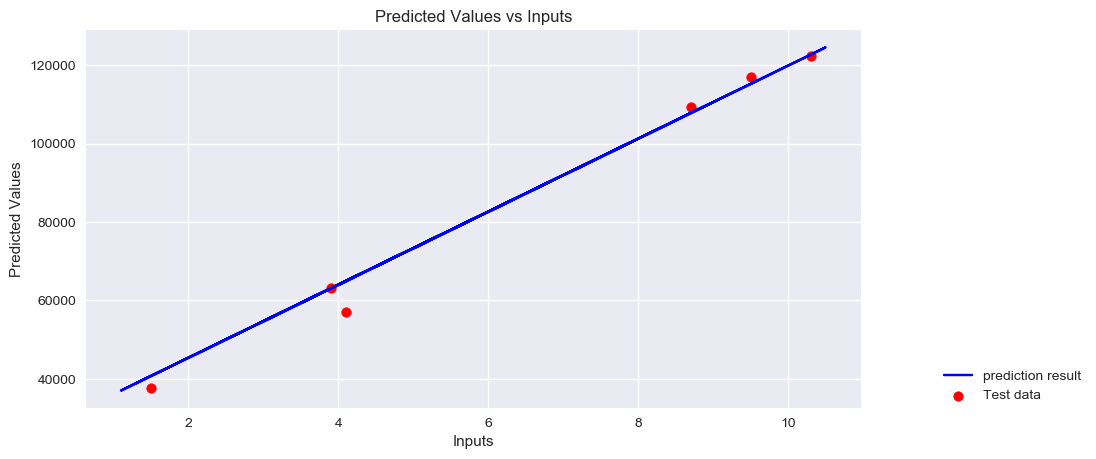

In [7]:

plt.figure(figsize=(10,5),dpi=100)
plt.style.use('seaborn')
plt.scatter(x_test, y_test, color = 'red', marker = 'o', label = 'Test data')
plt.plot(x_train, regressor.predict(x_train), color = 'blue', label='prediction result')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc=(1.1,0))
plt.show()

In [8]:
#multiple linear regression
# single dependent variable and more than one independent variable
#y=b0 + b1x1 + b2x2 .....+bnxn

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [10]:
data2=pd.read_csv('houses_to_rent_v2.csv')
data2['floor'] = data2['floor'].replace(['-'],'7')
data2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [11]:
x2 = data2.iloc[:,:-1]
y2 = data2.iloc[:,-1]

In [12]:
#label encoder
LE= LabelEncoder()
x2.iloc[: , 6] = LE.fit_transform(x2.iloc[: , 6])
x2.iloc[: , 7] = LE.fit_transform(x2.iloc[: , 7])

In [13]:
#one hot encoder
CT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x2= np.array(CT.fit_transform(x2))
x2

array([[0.0, 0.0, 0.0, ..., 3300, 211, 42],
       [0.0, 0.0, 0.0, ..., 4960, 1750, 63],
       [0.0, 0.0, 1.0, ..., 2800, 0, 41],
       ...,
       [0.0, 0.0, 0.0, ..., 6000, 332, 78],
       [0.0, 0.0, 0.0, ..., 12000, 279, 155],
       [0.0, 0.0, 0.0, ..., 1400, 165, 22]], dtype=object)

In [14]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [15]:
regressor1 = LinearRegression()
regressor1.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
regressor1.score(x2_test,y2_test)

0.9999999711330292

In [17]:
regressor1.coef_

array([ 2.48385528e-01, -1.05364113e-01, -1.50677357e-01, -1.70024031e-01,
        1.77679974e-01, -5.69746972e-04, -8.25642955e-02,  8.64881853e-02,
       -2.48741049e-02, -2.11559541e-02, -2.20694016e-01,  1.65104206e-01,
        1.00009714e+00,  9.99918632e-01,  9.99976831e-01,  1.00719307e+00])

In [18]:
regressor1.intercept_

0.19651687674377172

In [19]:
regressor1.predict(x2_test)

array([2450.00136919, 5924.1683018 , 4061.32693435, ..., 4353.9650296 ,
       2116.2835601 , 2311.39781163])

In [20]:
y2_test

5474     2450
1167     5924
3156     4061
124      6689
1158     6347
         ... 
5378     2416
8636     4835
10185    4354
8348     2116
2357     2311
Name: total (R$), Length: 2139, dtype: int64